# Type of the data in time series : 
time series data is having the time componenet which is driving the values of varios components 
time series problem can be of 2 types : 
* classifcation ( in ECG we can have the classification model which will give us abnormalities in the heart rate of person ) 

* Forecasting : ( in this type suppose we are monitoring the data of bitcoin prices and we are trying to see if we can get the predicted price of tom using time series )

` all of this problems having the time component in them this makes them time series problem `

more specific examples of the forecasting problems : 
1. uber ( market demand ) how many cars shoudl be there at some point in time 
2. computer requirements : how much compute powers do they need to monitor the drivers etc something which will be needed 
3. marketing compaigns : if they wanted to advertise particular area how much impact to income does it gonna make is making this ad campagans worths  it 


## forecasting problems in daily life : 
1. predicting how's the weather how good is the weather forcast currently 
> `the longer you forecast in future error chances of your predictions are wrong are more `
2. how much food do you need for next week ? 
  > forecasting how many food to keep in stock for your next week intake 

3. How long is it gonna take ? 
 > there are problems in forecasting in cell generally they are hardly correct 

### what you can predict and what you can't predict ? 
1. there are some inventions which are unplanned and their impact on world
2. predictabiliy of the event depends on several factors : 
- how did it contribute to it 
- how much data is available 
- how similar future is to the past 
- wheather the forecasts can affect the thing we are trying to forcast ( is some kind of external factor is gonan affect your predictions which is totally unpredictable ) 

open systems : `any kind of markets`
closed systems : `electricity used by some household ` this can be predicted if we have several years of data for the price and the electric usage over the year 

# what are we going to cover into the module
* downloading and formatting the data 
* writing preprocessing function to write our time series data 
* Buiding the multivariate model to take in multivariate time series data 
* replicating the N-beats algo using TF 
* Making forecasts with prediction intervals 
* Demonstrating why time series forecasting can be BS with turkey problem 

# Bit predict 
we have many inputs and the output horoizon is 1 
data is in [batchsize, windowsize] 


output : [actual price]


* link to the datset : https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


In [1]:
# Writing the tensorflow code to predict the prize of bitcoin based on the historical data 


# loading the dataset 


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-07-18 11:16:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2021-07-18 11:16:50 (11.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



now we have the dataset downloaded in the colab local format 

### Now we have to import data with the panas 

In [3]:
# importing with pandas 
import pandas as pd 
# reading in our bitcoin data nad prase the dates 

In [4]:
# parsing the bitcoin data and indexing it on the index 
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates = ['Date'],index_col = ['Date'])

In [5]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
len(df)

2787

In [8]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


we've about the 8 years data and daily prices of the data 

we've collected the data for past 8 years 2700 samples 

typically deep learning models requires lot of data 
  smaller no of samples we opten run into the time series data problem 

 often we will have the less data in time series than other type of the domain 


**seasonality** : of a time series dataset is referred as the number of samples per year . So for our bitcoin data it has the seasonality of daily value  of 365 because we are collecting one sample per day meaning we will get 365 samples per day 

# trying to load data with csv reader from python   

In [9]:
import csv 
# csv_df = csv.reader('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', newline='') as csvfile:
     reader = csv.DictReader(csvfile)
     for row in reader:
         print(row['Date'], row['Currency'])

2013-10-01 BTC
2013-10-02 BTC
2013-10-03 BTC
2013-10-04 BTC
2013-10-05 BTC
2013-10-06 BTC
2013-10-07 BTC
2013-10-08 BTC
2013-10-09 BTC
2013-10-10 BTC
2013-10-11 BTC
2013-10-12 BTC
2013-10-13 BTC
2013-10-14 BTC
2013-10-15 BTC
2013-10-16 BTC
2013-10-17 BTC
2013-10-18 BTC
2013-10-19 BTC
2013-10-20 BTC
2013-10-21 BTC
2013-10-22 BTC
2013-10-23 BTC
2013-10-24 BTC
2013-10-25 BTC
2013-10-26 BTC
2013-10-27 BTC
2013-10-28 BTC
2013-10-29 BTC
2013-10-30 BTC
2013-10-31 BTC
2013-11-01 BTC
2013-11-02 BTC
2013-11-03 BTC
2013-11-04 BTC
2013-11-05 BTC
2013-11-06 BTC
2013-11-07 BTC
2013-11-08 BTC
2013-11-09 BTC
2013-11-10 BTC
2013-11-11 BTC
2013-11-12 BTC
2013-11-13 BTC
2013-11-14 BTC
2013-11-15 BTC
2013-11-16 BTC
2013-11-17 BTC
2013-11-18 BTC
2013-11-19 BTC
2013-11-20 BTC
2013-11-21 BTC
2013-11-22 BTC
2013-11-23 BTC
2013-11-24 BTC
2013-11-25 BTC
2013-11-26 BTC
2013-11-27 BTC
2013-11-28 BTC
2013-11-29 BTC
2013-11-30 BTC
2013-12-01 BTC
2013-12-02 BTC
2013-12-03 BTC
2013-12-04 BTC
2013-12-05 BTC
2013-12-06

# Types of time series : 
* Trend : time series has clearly long-term increasing and decreasing data 
* seasonal factors : time series affected by the seasonal factors such as a time over years or a day of week 
* cycic : time series shows the rises and falls over unfixed time period whereas unlike seasonal they are not repeated over fixed period of time 
* time series is generally have the more of the seasonal and trains pattersn 
* no patterns : there are some signals which shows no relavance to any data at all 

## Type of data in time series : 
* univariate : only one value is varied over time 

* multivariabte : tehre are more than one variable which will predict the price of bitcoin

# Visualizing the data loaded by pandas 

In [10]:
# we only want closing price for each day 
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)":"Price"})

In [11]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


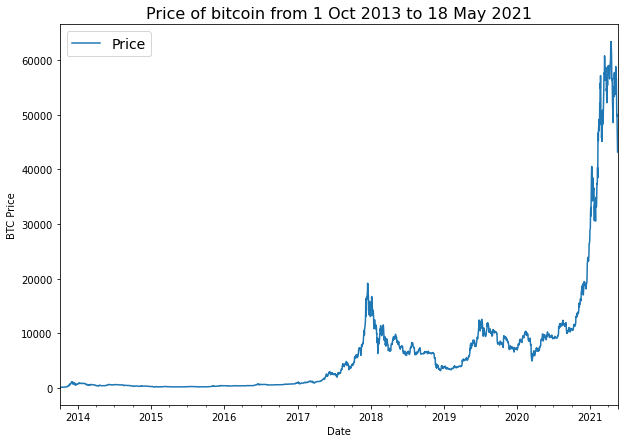

In [12]:
import matplotlib.pyplot as plt 
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Price of bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize = 14)

reading in with python csv and and plotting it 

In [13]:
# importing and formatting historical bitcoin data with python 
import csv 
from datetime import datetime 

timesteps = [] 
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f :
  csv_reader = csv.reader(f,delimiter=',')
  next(csv_reader) # goes to an iterator which will iterate through all of the rows 
  # next will skip the first top row 
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # getting the dates as dates 
    btc_price.append(float(line[2])) # getting closing price price and appending it ot the btc_price 

# viewing first 10 of each 
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

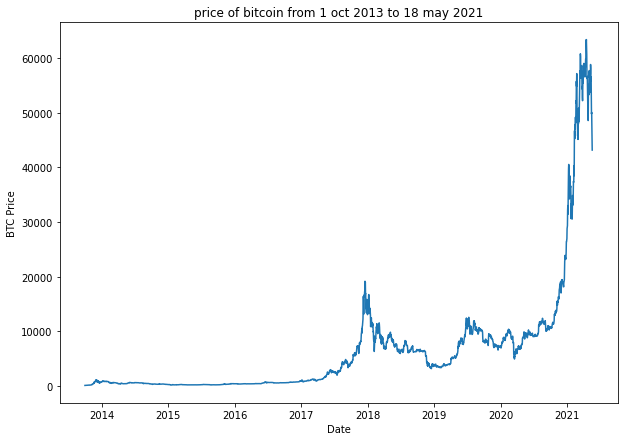

In [14]:
# plot from csv 
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel('BTC Price')
plt.title('price of bitcoin from 1 oct 2013 to 18 may 2021')
plt.xlabel('Date')

# converting the data into the training and testing sets of time series data(wrong way)

In [15]:
## creating training and test sets with time series data the wrong way 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [16]:
# wrong way to make the train/test sets for time series data 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(timesteps,#dates 
                                                   prices, #BTC prices 
                                                   test_size = 0.2,
                                                   random_state = 42)

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

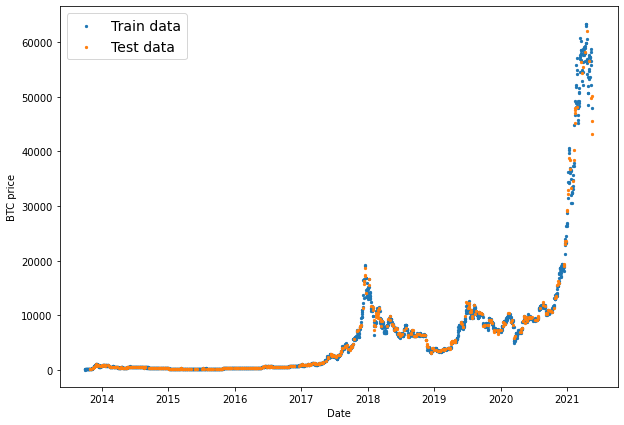

In [17]:
# when we have the time component shuffling the data is not really recommended 
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5 , label = 'Train data')
plt.scatter(X_test, y_test, s = 5 , label = 'Test data ')
plt.xlabel('Date')
plt.ylabel('BTC price')
plt.legend(fontsize = 14)
plt.show()

# creating the training and test dataset right way 

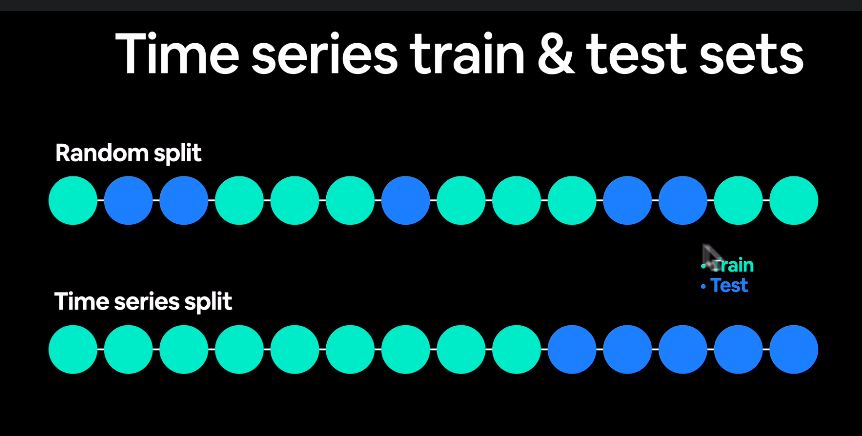

In [18]:
# create train and test split right way for time series data 
split_size = int(0.8 * len(prices)) # 80 % train and 20 % test 

# creating the train data splits 
X_train, y_train  = timesteps[:split_size], prices[:split_size]

X_test, y_test  = timesteps[split_size:] , prices[split_size:]

len(X_train) , len(X_test) , len(y_train), len(y_test)

(2229, 558, 2229, 558)

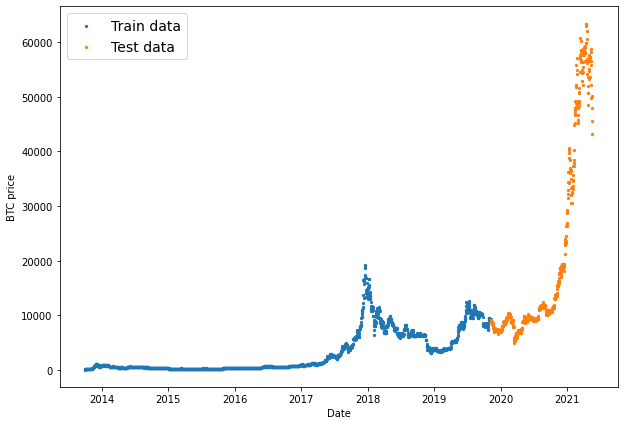

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(X_train , y_train ,s = 5 ,  label = 'Train data')
plt.scatter(X_test, y_test, s = 5 ,label = 'Test data ')
plt.xlabel('Date')
plt.ylabel('BTC price')
plt.legend(fontsize = 14 ) 
plt.show()

## Creating the plotting functions 
trying plotting the code it's tedious lets functionalize it 

In [20]:
# create the function to plot hte time series data  
def plot_time_series(timesteps , values, format = '.', start = 0 , end = None , label = None):
  """
  plot time against the time 
  parameters : 
  timesteps : array fo timestep values
  format : style of plot , default '.'
  start : where to start the plot ( setting the vlaues will index from start of timesteps ) 
  end : where to end the graph 
  label : label to show plot about values , default None 
  """
  # plt.figure(figsize=(10,7))

  plt.plot(timesteps[start:end],values[start:end], format , label = label)
  plt.xlabel('time')
  plt.ylabel('BTC Price')
  if label: 
    plt.legend(fontsize = 14) # making label bigger  
  plt.grid(True)


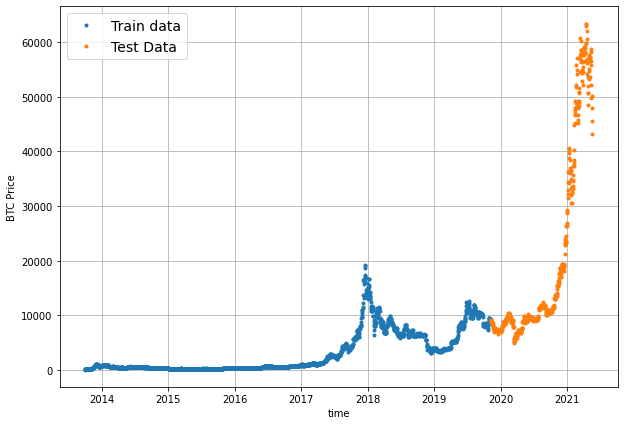

In [21]:
# testing out the plotting funtion 
plt.figure(figsize = (10 , 7 ))
plot_time_series(timesteps= X_train , values = y_train , label = 'Train data')

plot_time_series(timesteps=X_test , values = y_test, label = 'Test Data')


# Modelling experiments which we are going to run to train no the training data and forcast the test data 

we've got some historical data let's run the series of modelling experiment to see which model performs the best 

* horizon : no of time steps into future we are going to predict 
* window_size : no of time steps we are going to use for predict **horizon**

the further which we are trying to future in the future the result will be mad 

0. Naive model 
1. Dense model ( horizon = 1, windows =7 ) 
3. Same as model 1 ( horizon 1, windows 30)
4. same as model 1 (horizon = 7 , window = 30 ) 
4. Conv1D
5. LSTM 
6. Same as model 1 ( with multivariate data ) 
7. N-BEATS algorithm 
8. Ensemble (multiple models stacked ) 
9. future prediction model 
10. Same as model 1 but with turkey data introduced 

 # Model0 :Making Naive model 

 # naive method is extremly simple and predictive 

the formulat looks like 
$$\hat{y}/_{t} = y_{t-1}$$ 
in English : 
> the predicion at time step t ( y-hat ) is equal to the timestep of value t -1 
for horizon of 1  

In [22]:
# creating the naive forecast 
naive_forecast = y_test[:-1]
naive_forecast[:10] , naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

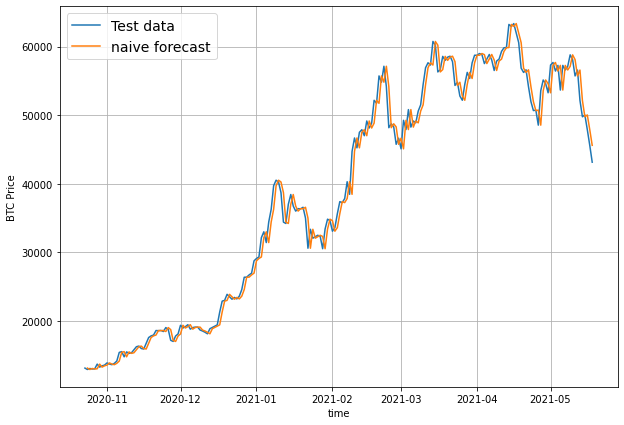

In [23]:
# plotting naive forecasy
plt.figure(figsize =(10,7))
# plot_time_series(timesteps=X_train , values=y_train , label = 'Train data')
plot_time_series(timesteps=X_test, values = y_test, start = 350 , format = '-' , label = 'Test data ')
plot_time_series(timesteps = X_test[1:],values = naive_forecast,start  = 350,  format = '-', label = 'naive forecast')

> read simple forcast chapter for forecasting principles in practice why the naive forecast is hard to beat does the term auto regressive come with it 

> common time series forecasting matrices 

what are we doing ? 
we are predicting a number , so that we have a form of a regression problem 

Because we are working on a regression problem we need some regression like matrices. 

A few common regression matrics which can be also used for time series 
* MAE mean absolute error 
* Mean squared error 
* Huber : 
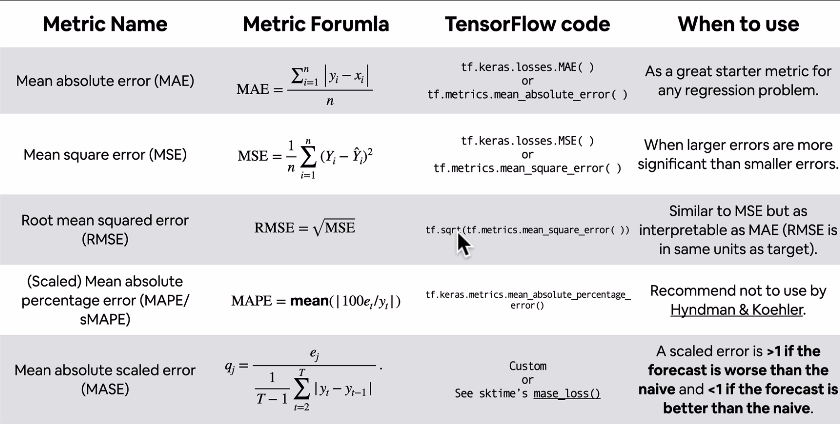
the main thing which we are evaluating is the how do our model forecast compare against the actual values of y_true and ground truth values 

#the lower the metric model is better 

In [24]:
# here we are haivng the non seasonal data ( stock market data ) 


In [25]:
import tensorflow as tf 

In [26]:
# MASE function implementation 
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Immplement MASE asuuming there is no seasonality of the data 
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # finidng mae of naive forecast 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))# seasonlaity is one day so the shift of 1 

  return mae/ mae_naive_no_season

In [27]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [28]:
def evaluate_pred(y_true,y_pred):
  # making sure the data is in flot 32 datatype

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)
  metrics = {}
  metrics['MAE']= tf.keras.losses.MAE(y_true, y_pred).numpy()
  metrics['MSE'] = tf.keras.losses.MSE(y_true, y_pred).numpy()
  metrics['RMSE'] = tf.sqrt(tf.keras.losses.MSE(y_true,y_pred)).numpy()
  metrics['MAPE'] = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()
  metrics['MASE'] = mean_absolute_scaled_error(y_true,y_pred).numpy()

  return metrics 

In [29]:
naive_results = evaluate_pred(y_test[1:], naive_forecast)

In [30]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

In [31]:
y_test[1:][:10], naive_forecast[:10]

(array([8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
        8760.89271814, 8749.52059102, 8656.97092235, 8500.64355816,
        8469.2608989 , 8537.33965197]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]))

In [32]:
tf.reduce_min(y_test) , tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [33]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

## other models which we can use for baseline and actual forecasts 

in this notebook we are focused on tensorflow and deep learning forecast there are 

## Format data part 2: windowing our dataset 

why do we window  ?
We window our time series dataset to turn our data into supervised learning problem 

``` 
windowing for 1 week 
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8] 
[2,3,4,5,6,7,8] -> [9]
```

In [34]:
print(f'we want to use this {btc_price[:7]}, to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795], to predict this 123.033


In [35]:
# Setting up the global variables for window and horizon sign 
HORIZON = 1 
WINDOW_SIZE = 7 


In [36]:
# creating function to label window data 
def get_labelled_window(x, horizon= 1):
  """
    creates lables for windowed dataset 

    if horizon = 1 ; 
    ip = [1,2,3,4,5,6,7] = output = ([1,2,3,4,5,6],[8]) 

  """
  return x[:,:-horizon],x[:,-horizon:]

In [37]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [38]:
print(f'test window is {test_window} and label is {tf.squeeze(test_label)}')

test window is [[1 2 3 4 5 6 7]] and label is 8


# Windows and horizon in time series 
 

 windows : past 6 days data 
 horizon : predict 7 th day data 

  we ou

# building the horizon and windows 

we could do this with normal for loop but for large data to speed this up we will use numpy array index

function will 
1. create a window step of specific window size 
2. use numpy indexing to create 2D array of multiple window steps : 
increment window by 1
3. uses 2 d array of mutliple window step to index on the target shape (price of bitcoin ) 
4. using get lablled window for creating the window and labels 

In [39]:
#  create a function to view numpy arrays as windows 
import numpy as np 
def make_windows(x, window_size = WINDOW_SIZE,horizon = HORIZON):
  """
  turns a 1D array into a 2D array of sequential labelled windows of window size with horizon size labels 
  """

  # 1 create a window of specific window size 
  window_step = np.expand_dims(np.arange(window_size+ horizon),axis = 0)

  # 2 create a 2d array of multiple winodw steps -1 to account for zero indexing 
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T # create 2D array of size window size 
  print(f'window_indexes : {window_indexes,window_indexes.shape}')

  # 3 index on the target array time series with 2d array of multiple window steps 
  windowed_array = x[window_indexes]
  print(windowed_array)

  #4. get the labelled windows 
  windows, labels = get_labelled_window(windowed_array,horizon = horizon)
  return windows, labels 

In [40]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE,horizon = HORIZON)

window_indexes : (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [41]:
len(full_windows), len(full_labels)

(2780, 2780)

In [42]:
for i in range(3):
  print(f'window: {full_windows[i]} -> Label {full_labels[i]}')

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [43]:
full_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

there is the function wihch does similar to above in `tf.keras.preprocessing.timeseries_dataset_from_array` 

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

## turning windows into training and test sets 


In [44]:
# making train test split 
def make_train_test_split(windows,labels, test_split = 0.2):
  """ 
  splits matching pairs of windows and labels into train and test split 
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 8 0% train and 20% test 
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [45]:
train_windows , test_windows , train_labels, test_labels = make_train_test_split(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [46]:
train_windows[:5], test_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [47]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [48]:
# check to see if the train labels are same before and after split 
np.array_equal(np.squeeze(train_labels[:-HORIZON -1]),y_train[WINDOW_SIZE:])

True

# creating the modelling checkpoint callback 


because our model performance will fluctuate from experiement to experiment we have to compare the model checkpoint so that we can compare apple to apples 


more specifically we want to compare each of our model best performances to other models best performances 

for example if our model performs best on epoch 55 but we trained for 100 epoch whatever is the case we want to compare that 55th epoch model to the data 

we can create modelling callbacks using tf.keras.callbacks.ModelCheckpoint 

In [49]:
import os 

# create a function to implement a ModalCheckpointCallback with a specific filename 
def create_model_checkpoint(model_name,save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),verbosity = 0 ,
                                            save_best_only = True, monitor= 'val_loss')

# starting the modelling experiments 
1. Model 1 : Dense model ( window = 7  ,horizon =1 ) 

Our first deep model is going to be simple dense model : 
* A single dense layer with 128 hidden units and ReLU 
* An output layer with linear activation(no activation) 
* Adam optimizer and MAE loss function
* Batch size of a 128 ( previously we used 32 ) since our data is small we can upscale more data with the model 
* 100 epochs 

why these values ? 
picked with the experimentation
are they optimum one then we can use the hyperparameter tuning tensorflow 
they are just the values which we can set together 

**Hyperparameters** values which you can adjust themselves 

**parameters** : values which our model learns on it's own 

In [50]:
import tensorflow as tf 
from tensorflow.keras import layers 
tf.random.set_seed(42)

#1 . construct the model 

model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation ='relu'),
                               layers.Dense(HORIZON,activation = 'linear'), 

],name = 'model_1_dense') # name our model so we can save it 

# compile the model 
model_1.compile(loss = 'mae',
                metrics = ['mae','mse'])

# fitting the model 
model_1_history = model_1.fit(x = train_windows, 
                              y = train_labels, 
                              epochs = 100 , 
                              verbose = 1, 
                              batch_size = 128 , 
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 11ms/step - loss: 437.3332 - mae: 437.3332 - mse: 1141983.5000 - val_loss: 889.8388 - val_mae: 889.8388 - val_mse: 2622247.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 172.2426 - mae: 172.2426 - mse: 141439.9375 - val_loss: 1195.2578 - val_mae: 1195.2578 - val_mse: 4187120.0000
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 177.3036 - mae: 177.3036 - mse: 155529.7656 - val_loss: 954.4788 - val_mae: 954.4788 - val_mse: 2932891.7500
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 180.0934 - mae: 180.0934 - mse: 156790.6406 - val_loss: 824.3761 - val_mae: 824.3761 - val_mse: 2298715.7500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 174.0324 - mae: 174.0324 - mse: 151596.7500 - v

In [51]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

In [52]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.4224 - mae: 625.4224 - mse: 1345152.0000


[625.42236328125, 625.42236328125, 1345152.0]

loading the model from model callbacks

In [53]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.8008 - mae: 604.8008 - mse: 1269415.2500


[604.80078125, 604.80078125, 1269415.25]

## Making forecasts with the model ( on the test dataset) 
To make "forecasts" on the test dataset let's write a function to
1. take a train model 
2. takes in some input data 
3. passes the input data to the model predict method 
4. returns the predictions 

In [54]:
def make_preds(model,input_data):
  """
  uuses model to making predictions of input data 
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [55]:
model_1_predictions = make_preds(model_1, test_windows)
model_1_results = evaluate_pred(y_true = tf.squeeze(test_labels), y_pred = model_1_predictions)

In [56]:
model_1_results

{'MAE': 604.8007,
 'MAPE': 2.693161,
 'MASE': 1.0624673,
 'MSE': 1269415.2,
 'RMSE': 1126.6833}

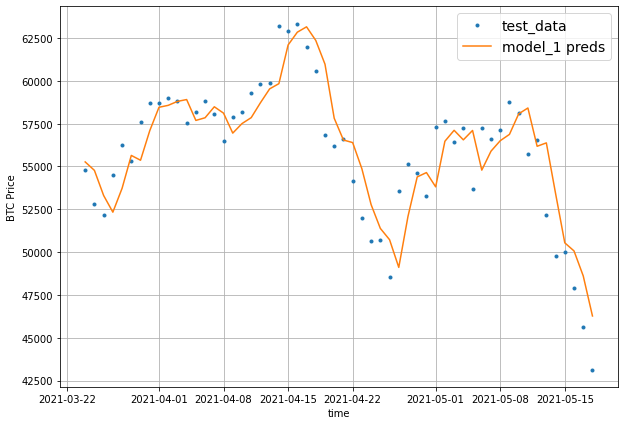

In [57]:
# plotting the model 1 predictions 
offset = 500 
plt.figure(figsize = (10,7))
# account for the test_window_offset and index into test_labels to ensure correct plotting 
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset , 
                 label = "test_data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_predictions,
                 start = offset, 
                 format = '-',
                 label = 'model_1 preds')

# Model 2 : Dense(window = 30 , horizon =1 ) 
architecture same as model 1 


In [58]:
# getting data as window 30 and horizon 1 
model_2_windows, model_2_labels = make_windows(prices,window_size = 30 , horizon = 1)
model_2_train_windows , model_2_test_windows , model_2_train_labels, model_2_test_labels = make_train_test_split(model_2_windows, model_2_labels)

window_indexes : (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [59]:
len(model_2_train_labels), len(model_2_train_windows)

(2205, 2205)

In [60]:
model_2_train_windows[0].shape

(30,)

In [61]:
len(model_2_test_windows), len(model_2_test_labels)

(552, 552)

In [62]:
model_2 = tf.keras.Sequential(
[    tf.keras.layers.Dense(128 , activation= 'relu'),
    tf.keras.layers.Dense(1,activation = 'linear')],name='model_2_dense'
)

# compiling the model 
model_2.compile(loss = 'mae',
                metrics = ['mae','mse'])

#fitting the model
model_2_history = model_2.fit(
    x = model_2_train_windows,y = model_2_train_labels,
    epochs = 100 , 
    batch_size = 128, 
    verbose = 1 , 
    validation_data = (model_2_test_windows,model_2_test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 792.8683 - mae: 792.8683 - mse: 3512792.7500 - val_loss: 1899.6785 - val_mae: 1899.6785 - val_mse: 9780993.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 453.2416 - mae: 453.2416 - mse: 795502.7500 - val_loss: 1477.8884 - val_mae: 1477.8884 - val_mse: 6926306.5000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 398.7665 - mae: 398.7665 - mse: 639664.5000 - val_loss: 2886.2378 - val_mae: 2886.2378 - val_mse: 19422078.0000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 391.9800 - mae: 391.9800 - mse: 614457.5000 - val_loss: 2183.5977 - val_mae: 2183.5977 - val_mse: 11775998.0000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 367.4041 - mae: 367.4041 - mse: 509724.

In [63]:
# loading in the best model_2 
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')

model_2_predictions = make_preds(model_2, model_2_test_windows)
model_2_results = evaluate_pred(y_true= tf.squeeze(model_2_test_labels),y_pred=model_2_predictions)
model_2_results

{'MAE': 794.32416,
 'MAPE': 3.5366204,
 'MASE': 1.3884864,
 'MSE': 2084949.4,
 'RMSE': 1443.9354}

In [64]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

In [65]:
model_1_results

{'MAE': 604.8007,
 'MAPE': 2.693161,
 'MASE': 1.0624673,
 'MSE': 1269415.2,
 'RMSE': 1126.6833}

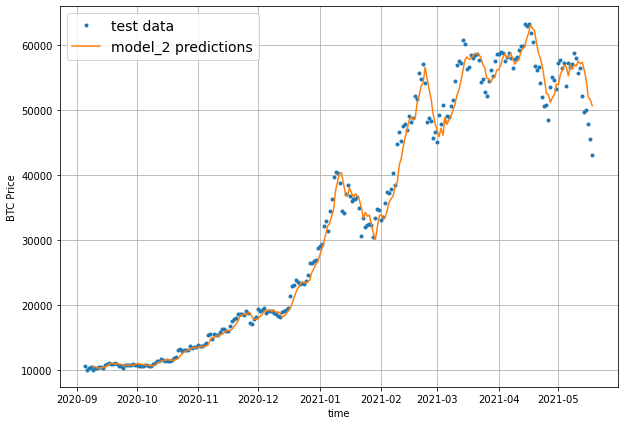

In [66]:
offset = 300 
plt.figure(figsize=(10,7))
# account for test window offset when plotting 
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset , label = 'test data')
plot_time_series(timesteps = X_test[-len(model_2_test_windows):], values = model_2_predictions,start = offset, format = '-', label = 'model_2 predictions')

# Model 3 : windowsize = 30 , horizon = 7 


In [67]:
# getting model 3 data 
full_windows,full_labels = make_windows(prices,window_size = 30 , horizon = 7)
model_3_train_values , model_3_test_values , model_3_train_labels  , model_3_test_labels = make_train_test_split(full_windows,full_labels)

window_indexes : (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [69]:
# making model 2 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128,activation = 'relu'),
                               tf.keras.layers.Dense(7, activation = 'linear')
],name = 'model_2_dense_30_7')

# compiling the model 
model_2.compile(loss = 'mae', 
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# fitting the model 
model_2_history = model_2.fit(model_3_train_values,model_3_train_labels , 
            batch_size = 128 , 
            epochs = 100 , 
            callbacks =[ create_model_checkpoint(model_name = model_2.name)],
            validation_data = (model_3_test_values,model_3_test_labels),
            verbose = 0)

INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: model_experiments

In [70]:
# loading in the best model 
model_3 = tf.keras.models.load_model('model_experiments/model_2_dense_30_7/')
model_3.evaluate(model_3_test_values, model_3_test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1235.0481 - mae: 1235.0481 - mse: 5353134.0000


[1235.048095703125, 1235.048095703125, 5353134.0]

In [71]:
model_3_predictions = make_preds(model = model_3, input_data = model_3_test_values)
model_3_results = evaluate_pred(y_true=tf.squeeze(model_3_test_labels), y_pred=model_3_predictions)

In [72]:
model_3_results

{'MAE': array([ 689.2882  ,  451.0943  ,  420.09207 ,  651.5787  ,  631.4697  ,
         768.9077  ,  706.042   ,  580.3159  ,  558.9059  ,  655.1476  ,
         840.9139  ,  821.2833  ,  949.2559  , 1022.13885 ,  687.0972  ,
         290.50543 ,  144.17244 ,  224.32317 ,  242.25607 ,  240.04744 ,
         203.81662 ,  242.80203 ,  394.7767  ,  377.3286  ,  282.70963 ,
         200.85156 ,  112.851425,  184.92961 ,  218.26793 ,  220.07346 ,
         299.49637 ,  432.64877 ,  396.52106 ,  346.15717 ,  353.59982 ,
         340.58475 ,  391.71967 ,  268.2795  ,  290.8519  ,  162.02303 ,
         432.26807 ,   68.27344 ,  104.706406,  103.38128 ,  221.23312 ,
         192.03654 ,  146.64244 ,  147.57129 ,  134.21756 ,  121.8471  ,
         191.99715 ,  170.48772 ,  246.92174 ,  230.1949  ,  241.8033  ,
         286.37842 ,  473.59244 ,  383.37402 ,  451.78857 ,  429.25168 ,
         253.55643 ,  185.31941 ,  287.5071  ,  250.61893 ,  332.15543 ,
         417.64865 ,  401.41776 ,  366.72113

 # Making our evaluation function work for different horizons 

In [73]:
def evaluate_pred(y_true,y_pred):
  # making sure the data is in flot 32 datatype

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)
  metrics = {}

  # account for different sized metrics for longer values 
  if tf.keras.losses.MAE(y_true, y_pred).numpy().ndim >0:
      metrics['MAE']= tf.reduce_mean(tf.keras.losses.MAE(y_true, y_pred).numpy()).numpy()
      metrics['MSE'] = tf.reduce_mean(tf.keras.losses.MSE(y_true, y_pred).numpy()).numpy()
      metrics['RMSE'] = tf.reduce_mean(tf.sqrt(tf.keras.losses.MSE(y_true,y_pred)).numpy()).numpy()
      metrics['MAPE'] = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()).numpy()
      metrics['MASE'] = tf.reduce_mean(mean_absolute_scaled_error(y_true,y_pred).numpy()).numpy()

  else:
    metrics['MAE']= tf.keras.losses.MAE(y_true, y_pred).numpy()
    metrics['MSE'] = tf.keras.losses.MSE(y_true, y_pred).numpy()
    metrics['RMSE'] = tf.sqrt(tf.keras.losses.MSE(y_true,y_pred)).numpy()
    metrics['MAPE'] = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()
    metrics['MASE'] = mean_absolute_scaled_error(y_true,y_pred).numpy()

  return metrics 

In [74]:
model_3_predictions = make_preds(model = model_3, input_data = model_3_test_values)
model_3_results = evaluate_pred(y_true=tf.squeeze(model_3_test_labels), y_pred=model_3_predictions)

In [75]:
model_3_results

{'MAE': 1235.0481,
 'MAPE': 5.651709,
 'MASE': 2.197699,
 'MSE': 5353134.0,
 'RMSE': 1421.0953}

In [76]:
X_test[:1]

array(['2019-11-08T00:00:00.000000000'], dtype='datetime64[ns]')

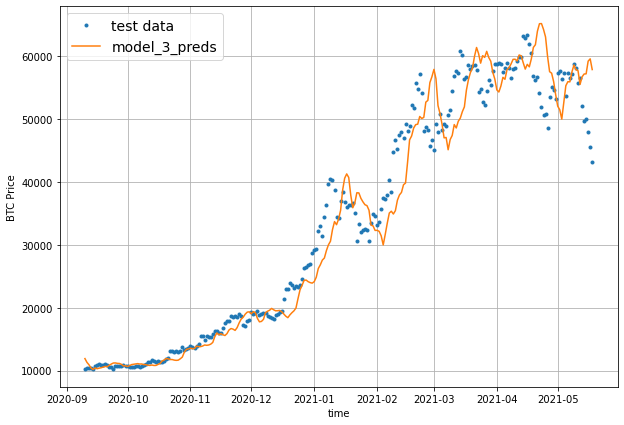

In [77]:
offset = 300 
plt.figure(figsize = (10, 7 )) 
plot_time_series(timesteps =X_test[-len(model_3_test_values):] ,values = y_test[-len(model_3_test_values):],label = 'test data',start = offset  )
plot_time_series(timesteps=X_test[-len(model_3_test_values):],values = tf.reduce_mean(model_3_predictions,axis =1 ),start = offset ,format = '-', label = 'model_3_preds')

In [78]:
naive_results['MAE']

567.9802

In [79]:
import pandas as pd 

models_combined = pd.DataFrame({
    'model_0':naive_results['MAE'],
    'model_1':model_1_results['MAE'],
    'model_2':model_2_results['MAE'],
    'model_3':model_3_results['MAE']
},index = ['MAE'])

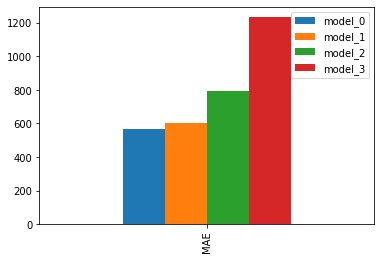

In [80]:
models_combined.plot(kind = 'bar')


autocorrelation : relatinoship between the current value and it's past values 

# Model 4 : conv 1D 


In [81]:
# predicting next day of bitcoin prices 
HORIZON = 1 
WINDOW_SIZE = 7 

In [82]:
full_windows,full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

window_indexes : (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [83]:
full_windows.shape, full_labels.shape

((2780, 7), (2780, 1))

In [84]:
# creating the train and test set 
train_windows, test_windows , train_labels,test_labels = make_train_test_split(full_windows,full_labels)

In [85]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

to use the conv1d layer we need input shape of `(batch_size, timesteps, input_dim)`

In [86]:
train_windows[0].shape

(7,)

In [87]:
# before we pass our data to the conv1d layer we have to reshape the data to make sure it works 

x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [88]:
expand_dims_layer = layers.Lambda(lambda x:tf.expand_dims(x, axis = 1))

In [89]:
# testing out lambda layer
print(f'original shape : {x.shape} \n expanded_shape{expand_dims_layer(x).shape} \n \n original values with expanded layer {expand_dims_layer(x)}')

original shape : (7,) 
 expanded_shape(7, 1) 
 
 original values with expanded layer [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [90]:
# create a conv1d model 

#lambda layer 
# conv1d model filter 128 , kernel_size = 3 , padding = valid ,
# output layer = dense 

model_4 = tf.keras.Sequential(
 [   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis =1)),
    tf.keras.layers.Conv1D(128,3,padding = 'causal',activation ='relu'),
    tf.keras.layers.Dense(HORIZON,activation = 'linear')]
    ,name = 'model4_convmodel'
)

# compiling model 4 
model_4.compile(
    loss = 'mae', 
    metrics = ['mae', 'mse'],
    optimizer = tf.keras.optimizers.Adam()
)

# fitting the model 4 
model_4_history = model_4.fit(train_windows, train_labels, 
                              epochs = 100, 
                              validation_data = (test_windows, test_labels),
                              batch_size = 128, 
                              callbacks = [create_model_checkpoint(model_name = model_4.name)]
                              )

Epoch 1/100
18/18 [==============================] - 28s 35ms/step - loss: 1517.8208 - mae: 1517.8208 - mse: 7350866.5000 - val_loss: 1021.7786 - val_mae: 1021.7786 - val_mse: 3492666.5000
INFO:tensorflow:Assets written to: model_experiments/model4_convmodel/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 305.7658 - mae: 305.7658 - mse: 376703.3125 - val_loss: 1558.0471 - val_mae: 1558.0471 - val_mse: 5960078.5000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 213.2753 - mae: 213.2753 - mse: 220141.5312 - val_loss: 1006.0186 - val_mae: 1006.0186 - val_mse: 3284029.2500
INFO:tensorflow:Assets written to: model_experiments/model4_convmodel/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 183.0230 - mae: 183.0230 - mse: 170935.2031 - val_loss: 988.9467 - val_mae: 988.9467 - val_mse: 3299184.2500
INFO:tensorflow:Assets written to: model_experiments/model4_convmodel/assets
Epoch 5/100
18/18 [===========

In [91]:
model_4.summary()

Model: "model4_convmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            2816      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [92]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 8ms/step - loss: 591.4638 - mae: 591.4638 - mse: 1205805.0000


[591.4638061523438, 591.4638061523438, 1205805.0]

In [93]:
# loading back in the best performing model 
model_4 = tf.keras.models.load_model('model_experiments/model4_convmodel/')

In [94]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.3435 - mae: 568.3435 - mse: 1168719.3750


[568.343505859375, 568.343505859375, 1168719.375]

In [95]:
# making predictions 
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8880.005, 8790.094, 9013.62 , 8765.98 ], dtype=float32)>

In [96]:
model_4_results = evaluate_pred(y_true = test_labels, y_pred = model_4_preds)

In [97]:
model_4_results

{'MAE': 17146.502,
 'MAPE': 113.33807,
 'MASE': 30.121655,
 'MSE': 614958700.0,
 'RMSE': 23726.26}

# Model 5 LSTM layer for series forecasting 


In [98]:
# the data for model 4 and model 5 is same so we don't have to reformat the data again 


In [99]:
model_5 = tf.keras.Sequential([
                                      tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)),
                                      # tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(128, activation = 'tanh')), 
                                      tf.keras.layers.LSTM(128,activation = 'relu'),
                                      tf.keras.layers.Dense(HORIZON, activation = 'linear')
], name = 'model_5_LSTM')

model_5.compile(optimizer = tf.keras.optimizers.Adam(), 
                loss = tf.keras.losses.mae, 
                metrics = ['mae', 'mse'])

model_5_history = model_5.fit(train_windows, train_labels, 
                              epochs = 100, 
                              batch_size = 128 , 
                              validation_data = (test_windows, test_labels), 
                              callbacks = [create_model_checkpoint(model_name = model_5.name)])


Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 1746.2535 - mae: 1746.2535 - mse: 8688391.0000 - val_loss: 2438.0605 - val_mae: 2438.0605 - val_mse: 12658673.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 248.7505 - mae: 248.7505 - mse: 264520.9062 - val_loss: 1073.8506 - val_mae: 1073.8506 - val_mse: 3337697.2500
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 185.2740 - mae: 185.2740 - mse: 178848.1250 - val_loss: 1032.8318 - val_mae: 1032.8318 - val_mse: 3366720.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 174.9746 - mae: 174.9746 - mse: 168242.5000 - val_loss: 865.9207 - val_mae: 865.9207 - val_mse: 2525691.0000
INFO:tensorflow:Assets written to: model_e

In [100]:
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM/')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.8386 - mae: 574.8386 - mse: 1201486.2500


[574.838623046875, 574.838623046875, 1201486.25]

In [101]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               69632     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_5_preds = model_5.predict(test_windows)
model_5_results = evaluate_pred(tf.squeeze(test_labels), model_5_preds)

In [103]:
model_5_results

{'MAE': 17157.197,
 'MAPE': 113.47167,
 'MASE': 30.140444,
 'MSE': 615691460.0,
 'RMSE': 23725.512}

In [104]:
model_4_results

{'MAE': 17146.502,
 'MAPE': 113.33807,
 'MASE': 30.121655,
 'MSE': 614958700.0,
 'RMSE': 23726.26}

In [105]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

# Model6 : Same as model 1 in multivariate data 

because neural networks are such a powerful algorithms they can be used for almost any problem but this doesn't gaurrenty that the model will predict the accurate results 

before we add feature to the time series what is the feature we can use 

one feature is if someone else tweets on that day ... 

* day 1 - 0 
* day 2 - 0 
* day 3 - 1 


what the feature we should use 

> Multivariate data : 
`days on which Elon Tusk Tweets` 
> how about bitcoin halving events ? 
this might be influence the prices 

In [106]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [107]:
# let's add the bitcoin having events to our dataset 
block_reward_1 = 50 # 3 jan 2019 
block_reward_2 = 25 # 8 nov 2012 
block_reward_3 = 12.5 
block_reward_4 = 6.25

# turning the block reward dates 
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [108]:
# create date ranges where specific block_reward values should be 
block_reward_2_days =( block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [109]:
# adding in block reward value as a feature 

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None 

# adding in block_reward values as a feature to our dataframe

bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1 ] = block_reward_4

In [110]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


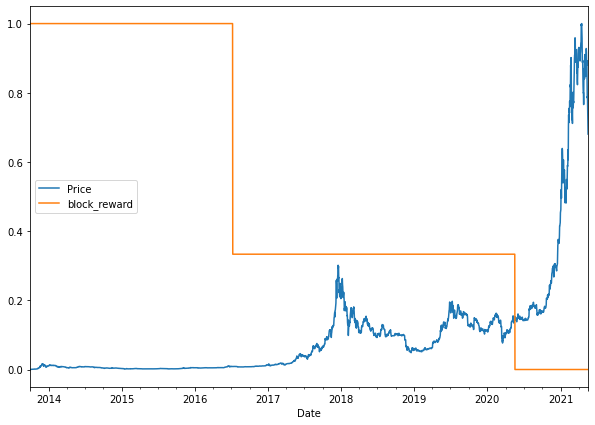

In [111]:
# plotting the block reward vs price over time 
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                                  columns = bitcoin_prices_block.columns, 
                                                  index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize = (10,7))

In [112]:
scaled_price_block_df

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


## making windowed dataset with pandas 

previously we have turned our univariate time series into windowed dataset using helper functions above 

however with multivariate data these functions will not work 

wee can use pandas.DataFrame.Shift() method for working with the multivariate data and to make windows out of it 

In [113]:
# setup dataset hyperparameters 
HORIZON = 1 
WINDOW_SIZE = 7  

In [114]:
# making the copy of bitcoin historical data with block reward function 
bitcoin_prices_windowed= bitcoin_prices_block.copy()


# adding windowed columsn 
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price + {i+1}'] = bitcoin_prices_windowed['Price'].shift(periods= i+1) 

bitcoin_prices_windowed.head()

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


what we've done is created a way to window our dataset from pandas dataframe 

``` 
[0,1,2,3,4,5,6,block_reward] - > 7
[1,2,3,4,5,6,7,block_reward] -> 8 
```


In [115]:
X = bitcoin_prices_windowed.dropna().drop('Price', axis =1 ).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [116]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [117]:
split_size = int(len(X)* 0.8) 
X_train, y_train = X[:split_size] , y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [118]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 8), (2224,), (556, 8), (556,))

# Building model 6 with above data similar architecture to `model1`

In [119]:
# defining model architecture
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation = 'relu'),
                               tf.keras.layers.Dense(128,activation = 'relu'),
                               tf.keras.layers.Dense(HORIZON)
], name ='model_6_dense_multivariate')

# compiling the model 

model_6.compile(loss = 'mae', 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['mae', 'mse'])

# fitting the model 
model_6_history = model_6.fit(X_train, y_train, 
                              epochs = 100, 
                              batch_size = 128, 
                              validation_data= (X_test, y_test),
                              callbacks = [create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 1168.5255 - mae: 1168.5255 - mse: 5506129.0000 - val_loss: 1033.3315 - val_mae: 1033.3315 - val_mse: 3613140.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 277.9497 - mae: 277.9497 - mse: 293868.3438 - val_loss: 997.6810 - val_mae: 997.6810 - val_mse: 3297010.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 202.5635 - mae: 202.5635 - mse: 200692.1719 - val_loss: 1376.8085 - val_mae: 1376.8085 - val_mse: 4827101.5000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 175.3446 - mae: 175.3446 - mse: 161534.4688 - val_loss: 899.2476 - val_mae: 899.2476 - val_mse: 2726303.2500
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epo

In [120]:
model_6.summary()

Model: "model_6_dense_multivariate"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


In [121]:
# evaluating the multivariate model 
model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 590.1282 - mae: 590.1282 - mse: 1195952.8750


[590.1282348632812, 590.1282348632812, 1195952.875]

In [122]:
# loading our best performing model 
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.4635 - mae: 566.4635 - mse: 1154916.8750


[566.4635009765625, 566.4635009765625, 1154916.875]

In [123]:
# making predictions on multivariate model 
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8812.815 , 8781.318 , 9067.7705, 8758.937 , 8741.05  ],
      dtype=float32)>

In [124]:
# evaluatinv the predictions to get eval metrics 
model_6_results = evaluate_pred(y_test, model_6_preds)

In [125]:
model_6_results

{'MAE': 566.46356,
 'MAPE': 2.536777,
 'MASE': 0.9951196,
 'MSE': 1154916.8,
 'RMSE': 1074.6705}

In [126]:
model_1_results

{'MAE': 604.8007,
 'MAPE': 2.693161,
 'MASE': 1.0624673,
 'MSE': 1269415.2,
 'RMSE': 1126.6833}

In [127]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

making 2 models and combining the results to get the results of the price let's try being functional 

In [128]:
price_inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation = 'relu')(price_inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
block_reward_inputs = tf.keras.layers.Input(shape=(1,))
y = tf.keras.layers.Dense(10,activation = 'relu')(block_reward_inputs)
concation_layer = tf.keras.layers.concatenate([x,y])
z = tf.keras.layers.Dense(64,activation = 'relu')(concation_layer)
outputs =tf.keras.layers.Dense(HORIZON)(z)

model_6_mod = tf.keras.Model(inputs = [price_inputs, block_reward_inputs], outputs = outputs,name = 'model_6_mod')

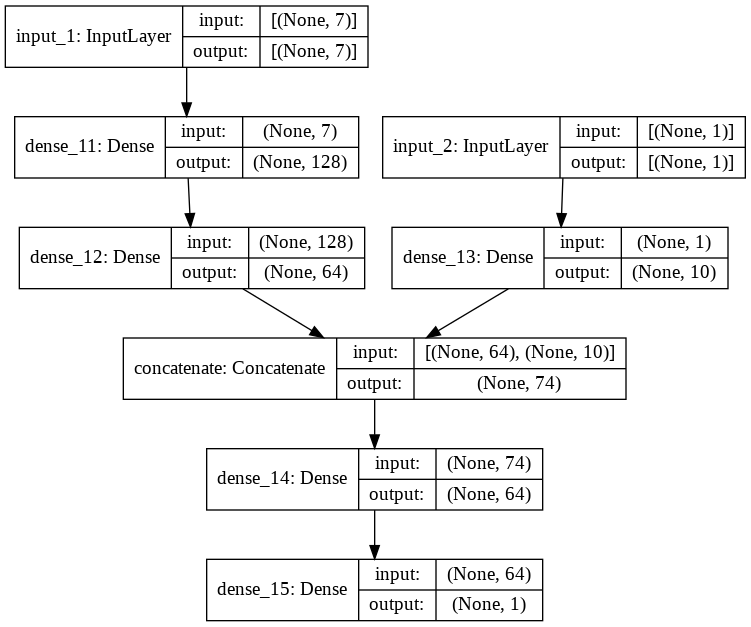

In [129]:
from tensorflow.keras.utils import plot_model 
plot_model(model_6_mod,show_shapes=True)

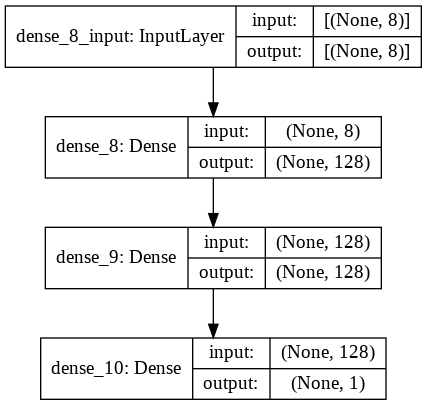

In [130]:
plot_model(model_6,show_shapes = True)

In [131]:
# compiling the model_6 mod 
model_6_mod.compile(optimizer = tf.keras.optimizers.Adam(), 
                    loss = tf.keras.losses.mae, 
                    metrics= ['mae', 'mse'])


In [132]:
# fitting the model 
model_6_mod_history = model_6_mod.fit(
    x = (X_train.drop('block_reward',axis =1),X_train.block_reward), 
    y = y_train , 
    epochs = 100 , 
    validation_data = ((X_test.drop('block_reward',axis =1),X_test.block_reward),y_test),
    batch_size = 128 , 
    callbacks = create_model_checkpoint(model_6_mod.name)
)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 982.3812 - mae: 982.3812 - mse: 4037525.7500 - val_loss: 1060.3010 - val_mae: 1060.3010 - val_mse: 3590513.2500
INFO:tensorflow:Assets written to: model_experiments/model_6_mod/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 248.6931 - mae: 248.6931 - mse: 251469.2969 - val_loss: 1061.3372 - val_mae: 1061.3372 - val_mse: 3520772.0000
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 191.4454 - mae: 191.4454 - mse: 187326.0312 - val_loss: 1128.6790 - val_mae: 1128.6790 - val_mse: 3608762.2500
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 179.8714 - mae: 179.8714 - mse: 166238.0938 - val_loss: 1028.9120 - val_mae: 1028.9120 - val_mse: 3150381.2500
INFO:tensorflow:Assets written to: model_experiments/model_6_mod/assets
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 169.0625 - mae: 169.0625 - mse: 150101.5781 -

In [133]:
# loading best model_6_mod

model_6_mod = tf.keras.models.load_model('model_experiments/model_6_mod')

# making predictions on test data 
model_6_mod_preds = make_preds(model_6_mod, input_data = ((X_test.drop('block_reward',axis =1),X_test.block_reward)))

In [134]:
model_6_mod_results = evaluate_pred(y_true = y_test, y_pred = model_6_mod_preds)
model_6_mod_results

{'MAE': 564.20984,
 'MAPE': 2.5464098,
 'MASE': 0.9911604,
 'MSE': 1153480.1,
 'RMSE': 1074.002}

In [135]:
model_6_results

{'MAE': 566.46356,
 'MAPE': 2.536777,
 'MASE': 0.9951196,
 'MSE': 1154916.8,
 'RMSE': 1074.6705}

In [136]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

# Model 7 : N_beats algorithms 

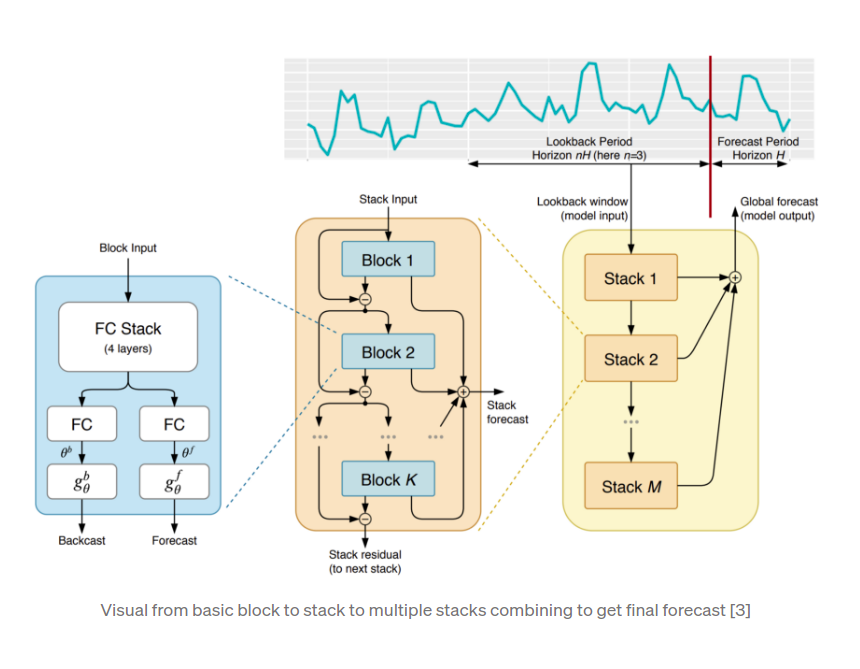

trying to build the above modest model for time series forecasting we've built 

model paper  https://arxiv.org/pdf/1905.10437.pdf

why ? 
* aloow us to practice replicating paper with tensorflow code 
* we will see how the tenosrflow subclassign 
* getting experience using functionsal api to create a custom architecture 
* getting the State of the Art results on our problem 

### Building and testing the N-BEATS block layer 

sicnce n-beats blockl yaer doesn't exist in tensorflow we have to create it 

In [137]:
# create NBeats custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, input_size: int 
               , theta_size : int ,
               horizon:int, n_neurons :int ,
               n_layers: int ,
               **kwargs):  # the keyword args argument takes care of all the argument of layer class eg trainalbe, input layers etc  
        super().__init__(**kwargs)
        self.input_size = input_size 
        self.theta_size = theta_size 
        self.horizon = horizon 
        self.n_neurons = n_neurons 
        self.n_layers = n_layers 

        # block contains stack of 4 fully connected layers each has ReLU activation 
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation= 'relu') for _ in range(n_layers)]
        # output of hte block is data layer with linear activation 
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation ='linear',name = 'theta_layer')

  def call(self,inputs):
        x = inputs
        for layer in self.hidden:
          x = layer(x)
        theta = self.theta_layer(x)
        backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon:]
        return backcast,forecast


Testing `NBeatsBlock` class

In [138]:
# with some dummy inputs and outputs 

dummy_nbeats_block_layer =NBeatsBlock(input_size = WINDOW_SIZE,
                                      theta_size = WINDOW_SIZE + HORIZON , # backcast + forecast 
                                      horizon = HORIZON,
                                       n_neurons = 128 , 
                                       n_layers = 4 , 
                                       )

In [139]:
# Creating dummy inputs (having same size as input size)

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [140]:
# passing dummy inputs to dummy NBeatsBlock layer 
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
#these are giong to be activation outputs from teh theta layer they'll be random due to no training of the model 
print(f'backast{tf.squeeze(backcast.numpy())}')
print(f'forecast {tf.squeeze(forecast.numpy())}')

backast[-0.00793746  0.38538665 -0.70846415  0.06556268  0.48282415  0.32071546
 -0.03437608]
forecast -0.16753625869750977


# Creating the model pipeline for the data 

## `tf.data`


In [141]:
# making out input data with tf.data
n_beats_model_data = bitcoin_prices.copy()

for i in range(7):
  n_beats_model_data[f'Price {i+1}'] = n_beats_model_data['Price'].shift(i+1)

In [142]:
x = n_beats_model_data.dropna().drop('Price', axis = 1 )
y = n_beats_model_data.dropna().Price

In [143]:
split_size  = int(len(x)*0.8)

X_train , y_train = x[:split_size],y[:split_size]
X_test, y_test = x[split_size:],y[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 7), (2224,), (556, 7), (556,))

In [144]:
# time to make our dataset performant using tf.data.API

In [145]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)


test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [146]:
# combining the lables and features by zipping together (features, labels ) 
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE = 1024


train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [147]:
train_dataset, test_dataset 

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

# settin up some hyperparameters NBEATS MODEL



In [148]:
N_EPOCHS = 5000
N_NEURONS = 512  # WIDTH STANDS FOR WIDTH OF NEURAL NETWORK 
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections  

before we craft th en beats model we need 2 layers for residual connections 

In [149]:
# making tensors 
tensor_1 = tf.range(10) + 10 
tensor_2 = tf.range(10)

# subtract = 
subtracted = layers.subtract([tensor_1 , tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f'Input tenosrs {tensor_1.numpy()} , {tensor_2.numpy()}')
print(f'subtracted = {subtracted.numpy} \n\n added = {added.numpy()}')

Input tenosrs [10 11 12 13 14 15 16 17 18 19] , [0 1 2 3 4 5 6 7 8 9]
subtracted = <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>> 

 added = [10 12 14 16 18 20 22 24 26 28]


### building and compiling and fitting N-Beats algorithm 
 
1. Setting up an instance of the N beats block layer using `n beats block ` this will be the inital first block other blocks can be created with simple for loop 

2. Create an input layer for N-Beats stack (using functional api ) 

3. making initial backcast and forecast for the model with the layer created in (1) 

4. use for loop to create stacks of the block layers 

5. Use the NBeatsBlock class within the for loop to create blocks which return backcasts and block-level forecasts 

6. we will use double residual stacking using subtract adn Add layers 

7. Put the model inputs and outputs togeter using `tf.keras.Modle()`

8. Compile the model with MAE loss ( the paper use multiple losses but we will use MAE to keep it in line iwht our other momdels 

9. use adam optimizer as optimizers 

10. fit the n-beats model for 5000 epoch s, fitting for so many epochs we are going to use couple of callback 
  * early stopping callback ( it's trianing for so long we will stop it early if it stops improving ) 
  * if model stopps improving , try lowering the learning rate to reduce teh amount it updates it's weights in each time take smaller steps each time 

In [150]:
%%time 

tf.random.set_seed(42)

# setting up instance of NBeatsBlock 
n_beats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                  name = 'n_beats_block')

# 2. create input layers for for making stacs 
stack_input = layers.Input(shape = (INPUT_SIZE), name = 'stack_input')

# 3. create initial backcaset and forecast inputs backward predictions + horizon prediction 

residuals, forecast = n_beats_block_layer(stack_input)

for i,_ in enumerate(range(N_STACKS-1)): # first stack is alredy created in 3rd step 
    # 5 : using the N beats block to calculate the backcast as well as the forecast block 
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size = THETA_SIZE,
                                  horizon = HORIZON,
                                  n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS,
                                  name = f'n_beats_block_{i}')(residuals)

    #6. create double residual stacking 
    residuals = layers.subtract([residuals, backcast] , name = f'subtract_{i}')
    forecast = layers.add([forecast, block_forecast], name = f'add{i}')


# 7 . putting stack mdoel together 
model_7 =  tf.keras.Model(inputs = stack_input, outputs = forecast , name = 'mmodel_7_n_beats')


# 8 . compiling the model 
model_7.compile(loss = 'mae', 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['mae', 'mse'])

# 9. Fitting the model with early stopping adn reduce ler on plateu callback 
model_7_history = model_7.fit(train_dataset, 
                              epochs = N_EPOCHS, 
                              validation_data = test_dataset, 
                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                            patience = 200,
                                                                            restore_best_weights= True),
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', 
                                           patience = 100 , 
                                           verbose = 1 )])

Epoch 1/5000
3/3 [==============================] - 8s 623ms/step - loss: 1680.5886 - mae: 1680.5886 - mse: 6809739.0000 - val_loss: 14187.8350 - val_mae: 14187.8350 - val_mse: 355068672.0000
Epoch 2/5000
3/3 [==============================] - 0s 63ms/step - loss: 3143.4292 - mae: 3143.4292 - mse: 52712184.0000 - val_loss: 12490.7568 - val_mae: 12490.7568 - val_mse: 275646912.0000
Epoch 3/5000
3/3 [==============================] - 0s 50ms/step - loss: 2571.0315 - mae: 2571.0315 - mse: 16604961.0000 - val_loss: 14866.1494 - val_mae: 14866.1494 - val_mse: 389714464.0000
Epoch 4/5000
3/3 [==============================] - 0s 51ms/step - loss: 1950.8961 - mae: 1950.8961 - mse: 8986708.0000 - val_loss: 1457.1882 - val_mae: 1457.1882 - val_mse: 6353597.0000
Epoch 5/5000
3/3 [==============================] - 0s 50ms/step - loss: 3023.5781 - mae: 3023.5781 - mse: 62959268.0000 - val_loss: 6375.9487 - val_mae: 6375.9487 - val_mse: 73810880.0000
Epoch 6/5000
3/3 [==============================

In [151]:
# Evaluate N-Beats model on test dataset 
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 572.8273 - mae: 572.8273 - mse: 1166136.8750


[572.8272705078125, 572.8272705078125, 1166136.875]

In [152]:
# making predictions with the n-beats model 
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.982, 8789.222, 9036.676, 8759.963, 8774.202, 8752.769,
       8654.922, 8513.541, 8482.473, 8518.423], dtype=float32)>

In [153]:
model_7_results = evaluate_pred(y_true = y_test, y_pred = model_7_preds)

In [154]:
model_7_results

{'MAE': 572.8273,
 'MAPE': 2.5949602,
 'MASE': 1.0062989,
 'MSE': 1166136.9,
 'RMSE': 1079.8782}

In [155]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

### Plotting the model 7  : NBEATS

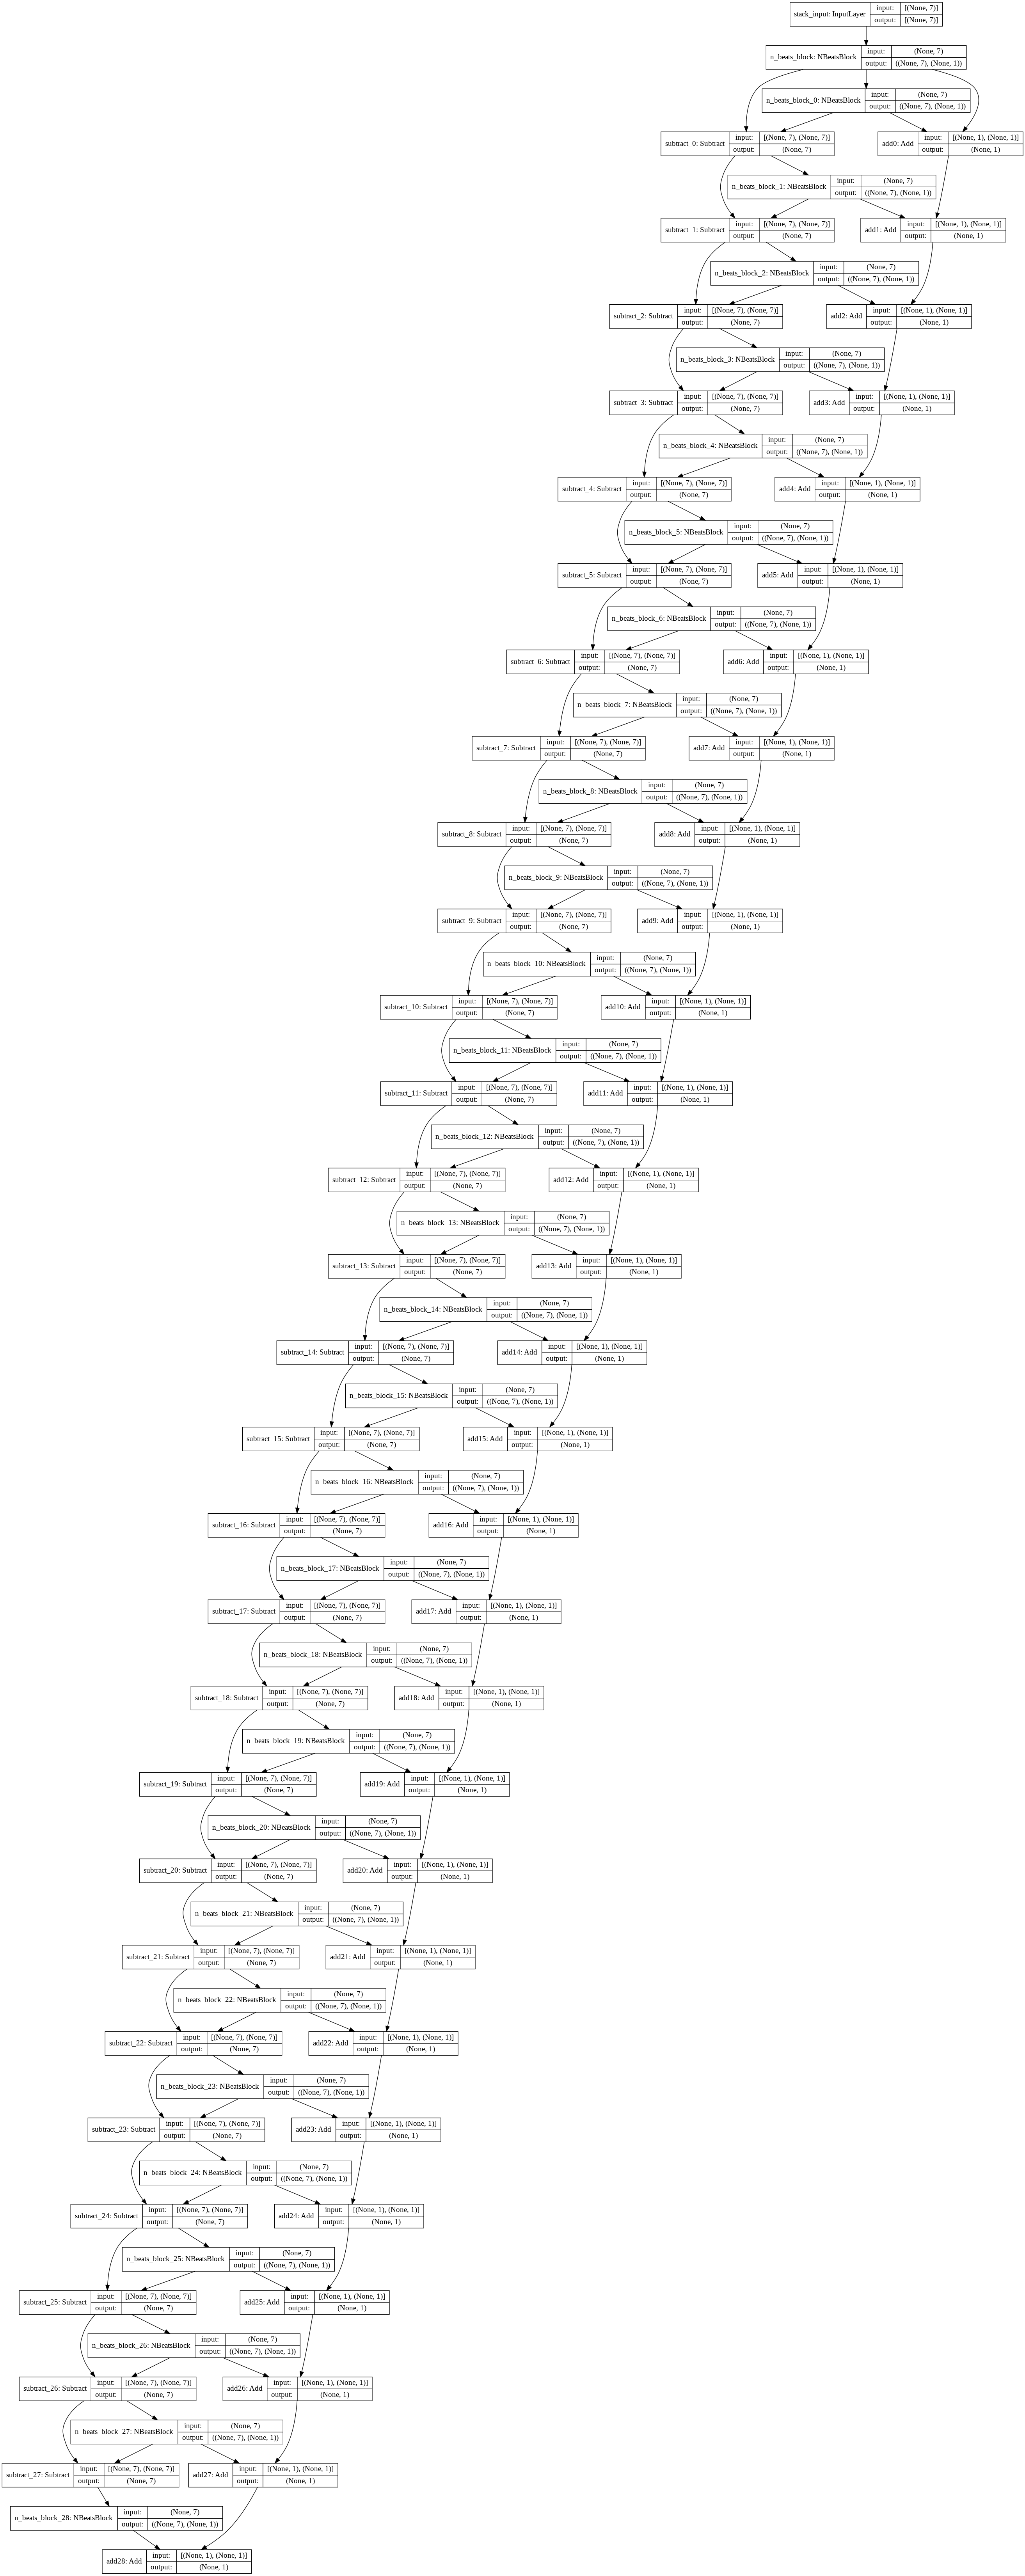

In [156]:
plot_model(model_7, show_shapes = True)

# Ensemble models : 
when you have to run different experiments  based on different hyperparameters which you set up

combining the differnet models of various types with help of ensemble model 

# model 8 : ensemble model 

combining many different model for predicting the same goal 

In [157]:
HORIZON, WINDOW_SIZE

(1, 7)

## constructing and fitting on ensemble of models (using different loss functions)

In [166]:
def get_ensembled_models(horizon = HORIZON,train_data = train_dataset,
                         test_data = test_dataset , 
                         num_iter = 10 , 
                         num_epochs = 1000, 
                         loss_fns= ['mae', 'mse','mape']):
  """
  return list of number itern mod3els trained on mae , mse and mape loss funciyoin 
  if numter = 10 , a list of 30 trained model will be returned ;"""
  
  # lists for trained ensemble model 
  ensemble_models = []
  for i in range(num_iter):
    # building and fitting new model with different loss function : 
    for loss_function in loss_fns:
      print(f'optimizing model by reducing : {loss_function} for {num_epochs} epochs, model number {i}')

      # constructing a simple model 
      model= tf.keras.Sequential([
                                  tf.keras.layers.Dense(128,kernel_initializer= 'he_normal', activation = 'relu'),
                                  tf.keras.layers.Dense(128,kernel_initializer= 'he_normal',activation = 'relu'),
                                  tf.keras.layers.Dense(HORIZON)
      ])

      # compiling simple model with current loss function 
      model.compile(loss = loss_function, 
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['mae','mse'])
      
      # fitting the current model 

      model.fit(train_data, epochs = num_epochs 
                , verbose = 0, 
                validation_data = test_data, 
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',patience=200, restore_best_weights=True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss',patience = 100,verbose =1)])
      
      # Appending the fitted model to the list of ensemble models 
      ensemble_models.append(model)
  return ensemble_models

In [167]:
%%time 
# getting list of trained models 
ensemble_models = get_ensembled_models(num_iter = 5, num_epochs= 1000)

optimizing model by reducing : mae for 1000 epochs, model number 0

Epoch 00512: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00661: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00761: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing : mse for 1000 epochs, model number 0

Epoch 00708: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00808: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing : mape for 1000 epochs, model number 0

Epoch 00175: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00278: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00378: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
optimizing model by reducing : mae for 1000 epochs, model number 1
optimizing model by reducing : mse for 1000 epochs, model number 1

Epoch 0

In [168]:
ensemble_models

In [169]:
!nvidia-smi

Sun Jul 18 11:49:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   1278MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Making predictions with ensemble models 

In [170]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [171]:
len(ensemble_models)

15

In [172]:
# creating the lists of the ensemble models 
%%time 
ensemble_preds= make_ensemble_preds(ensemble_models = ensemble_models,data = test_dataset)

CPU times: user 596 ms, sys: 32.1 ms, total: 628 ms
Wall time: 626 ms


In [173]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8802.11 ,  8840.432,  9104.737, ..., 50400.734, 48218.695,
        45504.414],
       [ 8754.091,  8737.128,  9015.403, ..., 50006.918, 48651.652,
        46262.664],
       [ 8803.71 ,  8788.14 ,  9067.485, ..., 49797.   , 48416.734,
        45780.125],
       ...,
       [ 8791.748,  8764.29 ,  8972.113, ..., 49801.7  , 48747.004,
        46250.2  ],
       [ 8804.327,  8770.583,  9044.3  , ..., 49569.34 , 48078.348,
        45919.652],
       [ 8753.164,  8760.969,  9107.774, ..., 50085.305, 48028.176,
        46037.566]], dtype=float32)>

In [175]:
# Ensemble predictions 
ensemble_results = evaluate_pred(y_true = y_test, y_pred = ensemble_preds)

In [177]:
ensemble_results


{'MAE': 575.4144,
 'MAPE': 2.6188002,
 'MASE': 1.0108439,
 'MSE': 1166706.0,
 'RMSE': 1080.0608}

In [179]:
ensemble_mean = tf.reduce_mean(ensemble_preds , axis = 0) 
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8789.324 ,  8777.948 ,  9066.184 ,  8736.347 ,  8735.603 ,
        8719.489 ,  8666.696 ,  8487.198 ,  8449.945 ,  8529.432 ,
        8204.341 ,  8098.405 ,  8045.9272,  7632.859 ,  7282.858 ,
        7306.5054,  7091.0444,  7210.4507,  7109.055 ,  7522.0723,
        7405.045 ,  7742.8306,  7573.9053,  7387.1943,  7335.0933,
        7314.797 ,  7216.056 ,  7381.5146,  7512.169 ,  7544.0425,
        7553.4077,  7331.369 ,  7234.8604,  7184.954 ,  7188.208 ,
        7230.9272,  7078.182 ,  7096.8413,  6869.116 ,  6586.4565,
        7391.2285,  7187.02  ,  7163.8013,  7265.692 ,  7257.086 ,
        7199.9956,  7215.8   ,  7212.0396,  7183.083 ,  7214.909 ,
        7309.5005,  7391.46  ,  7251.794 ,  7169.1855,  7164.3965,
        6954.1597,  7275.479 ,  7343.841 ,  7362.5215,  7718.2114,
        8069.4556,  8144.1426,  7858.0234,  8086.6504,  8101.3003,
        8169.5366,  8111.1265,  8737.495 ,  8906.142 ,  8769.428 ,
        8943.4

In [181]:
ensemble_mean_results = evaluate_pred(y_test, ensemble_mean)

In [182]:
ensemble_mean_results

{'MAE': 564.75586,
 'MAPE': 2.5629966,
 'MASE': 0.9921196,
 'MSE': 1138243.8,
 'RMSE': 1066.885}

In [ ]:
ensemble_median = np.median(ensemble_preds, axis =0 ) 


In [184]:
ensemble_meadian_results = evaluate_pred(y_test, ensemble_median)

In [185]:
ensemble_meadian_results

{'MAE': 563.749,
 'MAPE': 2.5543187,
 'MASE': 0.9903509,
 'MSE': 1136672.6,
 'RMSE': 1066.1486}

In [186]:
# but first saving all the models which we did lol 
model_1.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_1.name}')
model_2.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_2.name}')
model_3.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_3.name}')
model_4.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_4.name}')
model_5.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_5.name}')
model_6.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_6.name}')
model_7.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_7.name}')
model_6_mod.save(f'/content/drive/Shareddrives/Tabata/BItPredict/{model_6_mod.name}')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_1_dense/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_2_dense_30_7/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model4_convmodel/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_5_LSTM/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_6_dense_multivariate/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/mmodel_7_n_beats/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/mmodel_7_n_beats/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_6_mod/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Tabata/BItPredict/model_6_mod/assets


# Plotting the prediction intervals of our ensemble 

## Uncertainity estimates : 
so far we've been making poitn predicitions with our models 
eg horizon 1 ir only predicts only one value 

woudn't it be helpful if we knew the range from where the prediction range come from 

Instead of the 50000 usd on the dot how about 48000 to 52000 USD ? 

that will give us more idea what our model is thinking 

one way to get the 95% confidence prediction intervals for the deep learning model is bootstrap method : 
1. take prediction from randonly initialized models 
2. measure the standard deviation of the predictions 
3. multiply the standard deviation by 1.96( assuming the distrubution of the data is guassian / normal ) 95 % observation fall within 1.96 standard deviation of the mean 
4. To get the prediction interval upper and lower bounds , add and subtract the mvalue obtained in (3) to the mean/median in (1) 



In [191]:
# finding upper and lower bounds of ensemble predictions 
def get_upper_lower(preds): #1. Take a predictions from a number of randomly initalizied moeld 
  #2 measure the standard deviation of the deviation 
  std = tf.math.reduce_std(preds,axis = 0 ) 

  # 3 . multiply the standard deviation by 1.96 
  interval = 1.96 * std 
  #4. getting the predictions into upper and lower bounds 
  preds_mean = tf.reduce_mean(preds,axis = 0) 
  lower, upper = preds_mean - interval , preds_mean + interval 
  return lower, upper 



In [192]:
# getting the upper and lower bounds of 95% prediction interval 
lower , upper = get_upper_lower(preds = ensemble_preds)

In [193]:
lower,upper 

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8724.925 ,  8704.971 ,  8983.468 ,  8663.891 ,  8662.883 ,
         8671.315 ,  8606.486 ,  8428.892 ,  8404.53  ,  8476.26  ,
         8145.0205,  8046.0757,  7983.1855,  7557.448 ,  7191.0264,
         7221.2827,  7000.054 ,  7111.259 ,  7048.1167,  7440.6978,
         7348.445 ,  7671.8403,  7519.376 ,  7320.9624,  7287.8667,
         7251.796 ,  7158.5513,  7333.0957,  7479.9463,  7504.526 ,
         7520.3994,  7297.1807,  7181.7725,  7128.87  ,  7137.5757,
         7192.2905,  7040.0957,  7071.1484,  6819.0903,  6524.548 ,
         7289.5522,  7102.6675,  7060.3213,  7167.5596,  7163.4907,
         7166.4946,  7187.9185,  7180.41  ,  7151.9014,  7193.952 ,
         7279.0425,  7358.2407,  7220.779 ,  7141.644 ,  7129.7363,
         6898.243 ,  7230.493 ,  7304.7056,  7315.1025,  7651.3794,
         8006.6797,  8069.7754,  7796.127 ,  8027.477 ,  8035.441 ,
         8105.862 ,  8067.4526,  8653.206 ,  8837.982 ,  8689.663 ,

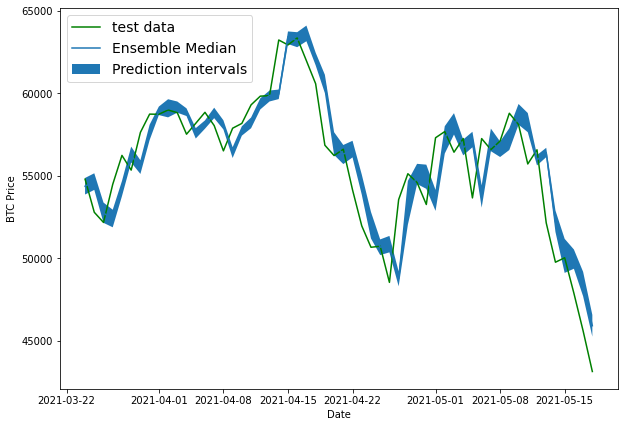

In [199]:
# getting the median/mean values of our ensemble preds 
ensemble_median = np.median(ensemble_preds,axis =0)
# plotting our ensemble models along with the prediction intervals 
offset = 500 
plt.figure(figsize= (10,7))
plt.plot(X_test.index[offset:],y_test[offset:],'g',label = 'test data ')
plt.plot(X_test.index[offset:],ensemble_median[offset:],'-', label = 'Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
# to plot upper and lower bounds use fill between 
plt.fill_between(X_test.index[offset:],
                 lower[offset:],
                 upper[offset:],
                 label = 'Prediction intervals')

plt.legend(loc='upper left',fontsize = 14);

so far all of the models have been lagging behind hte test data as is they're replicating what a naive model does and just predict the previous  timestep as the timestep

these prediciotn 

intervals estimators of tehmselves and they have been created with teh mdoel's data from normal distribution 

## two types of uncetainity : 
uncertain esimates in machine learning seek out to qualitively and qualitatively answer the predictions 

1. can my model know ? with prefect data what's possible to learn ? 
2. what doesn't my momdel now? what can  a model never predict? or would it helpful if the model can tell you that when it's making a predictions 


there are two major types of uncertanily in machin learning which we should know about 

* **ALeatoric uncertainiy** can't be reduced uncertainity often referred as teh data uncertainy or subway uncertainiy 
* **epitestemic uncertainity**  model / coconut uncerainity : which can be reduced with more data 


## Model 9 turkey data and the model which is predicting into actual future 